# Inaugural Project

Imports and set magics:

In [27]:
# Importing the necessary libraries and setting up the environment
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from ExchangeEconomy import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To illustrate the set of Pareto improvements, we code the function `pareto_improve` in `ExchangeEconomy.py`

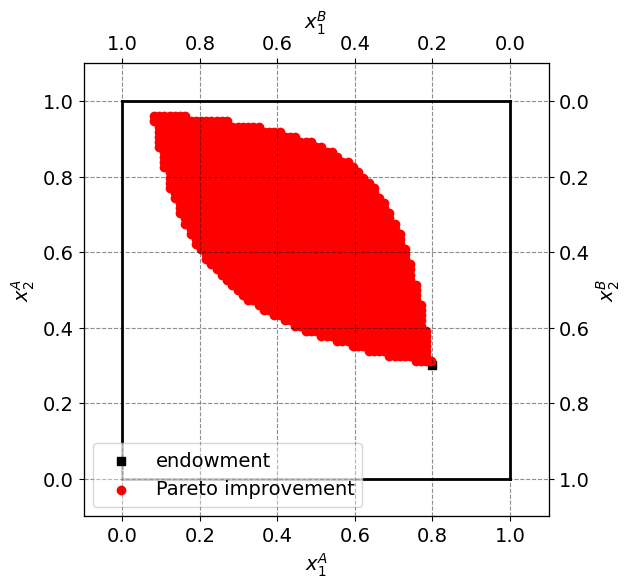

In [28]:
model = ExchangeEconomyClass()
par = model.par

N = 75 # number of points in grid for consumption
x1A, x2A = np.linspace(0,1,N), np.linspace(0,1,N)
pareto_improve = model.pareto_improve(x1A,x2A)

import matplotlib.pyplot as plt

# Extract the x and y coordinates from the pareto_improve list
x_coords = [pair[0] for pair in pareto_improve]
y_coords = [pair[1] for pair in pareto_improve]


# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x_coords, y_coords, label='Pareto improvement', color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower left');

# Question 2

In this question, we calculate the error in market clearing when $p_1 \in \mathcal{P}_1=\left\{0.5,0.5+2 \frac{1}{N}, 0.5+2 \frac{2}{N}, \ldots, 2.5\right\}$. This is done by looping over the all values in $\mathcal{P}_1$ and then using the function `pareto_improve`

In [30]:
# Defining the set of prices
start, N = 0.5, 75
p1 = np.array([start + 2.0*i/N for i in range(N + 1)])

# Allocating memory
error1 = np.zeros([N + 1])
error2 = np.zeros([N + 1])

error1, error2 = model.check_market_clearing(p1)

Now, we can plot the error in the market clearing condition.

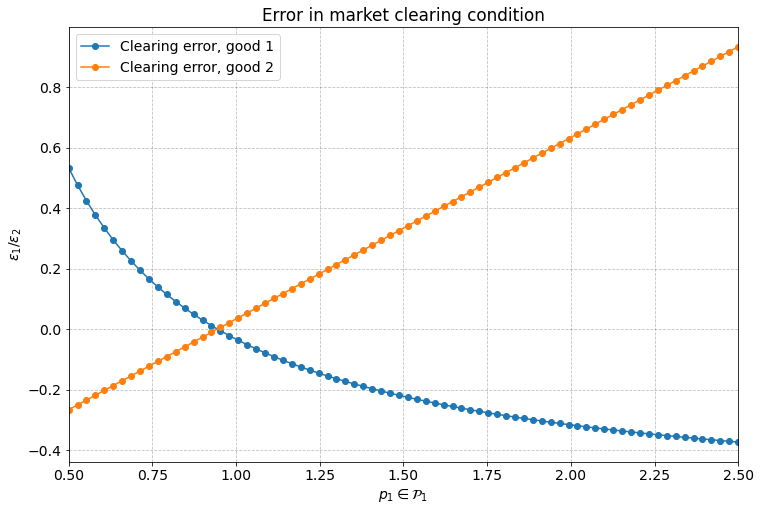

In [31]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
ax.set_title('Error in market clearing condition')
ax.plot(p1,error1,'-o',label='Clearing error, good 1')
ax.plot(p1,error2,'-o',label='Clearing error, good 2')

ax.set_xlabel('$p_1 \in \mathcal{P}_1$')
ax.set_ylabel('$\epsilon_1/\epsilon_2$')
ax.set_xlim([0.5, 2.5])
ax.legend(frameon=True)

The the above, it is seen that the equilibrium price is around 0.9 given this is where the error in market clearing is zero. Also the plot illustrates Walras' law that if one market clears, the other market will also clear.

# Question 3

Using Walras' law, we know that if one market clears, the other market will also clear. This implies that we can solve the root-finding problem $\epsilon_1(\boldsymbol{p}, \boldsymbol{\omega})=0$ i.e. market 1 will clear. Then we know, that market 2 will also be clearing. To implement in Python, we use SciPy with `optimize.root_scalar`.

In [32]:
# Solving the model using Walras's law + scipy's root_scalar function
model.solve()

Error in equilibrium (-1.8934853684982045e-13, 1.7896795156957523e-13) with equilbrium price p_1 = 0.944444


As conjectured in question 2, the market equilibrium is $p_1^*=0.944$. It is also seen that the error in the market clearing condition is close to machine precision.

# Question 4

We now solve the market maker problem for A using the discrete grid created in Q2 (question 4a) and using a continuous maximizer (question 4b). To solve the discrete problem, we use the function `solve_A_disc` and for the continuous maximization function `solve_A_cont`. In both problems, we impose the resource constraint by saying $x_1^A= 1 - x_1^B$ and the same for the other good.

In [43]:
model.solve_A_disc(p1)

Optimal price on discrete grid for agent A: 1.8867
The consumption for A is: x1A  = 0.6193, x2A = 0.6409 with utility u(x1A,x2A) =  0.6336
The consumption for B is: x1B  = 0.3807, x2B = 0.3591 with utility u(x1B,x2B) = 0.3734


In [44]:
model.solve_A_cont()

Optimal price for agent A is: 1.8992
The consumption for A is: x1A = 0.6209, x2A = 0.6401 with utility u(x1A,x2A) = 0.6336
The consumption for B is: x1B = 0.3791, x2B = 0.3599 with utility u(x1B,x2B) = 0.3726


It is seen that the two solutions are relativly close. However, due to a relativly small $N$, the discrete version does not quite nail it. We should expect to see the two solutions converge as $N\rightarrow \infty$.

# Question 5

Now, we look at what happens, when A chooses B's consumption such that B is no worse off than with her initial endowment. 

## Question 5A

In [24]:
# Do some reshaping to be able to put into the utility function
x1A_c, x2A_c = zip(*pareto_improve)
x1A_c, x2A_c = np.array(x1A_c).flatten(), np.array(x2A_c).flatten() # Flattening the list of tuples

# Calculate the utility for agent A for all points in the pareto set
utilityA_c = model.utility_A(x1A_c,x2A_c)

# Finding the maximum utility and the corresponding index
utilityA_max_c = np.max(utilityA_c)
index_c = np.argmax(utilityA_c)
print(f'The allocation is for agent A: x1A = {x1A_c[index_c]:.4f}, x2A = {x2A_c[index_c]:.4f} with utility u(x1A,x2A) = {utilityA_max_c:.4f}')
print(f'The allocation is for agent B: x1B = {1 - x1A_c[index_c]:.4f}, x2B = {1 - x2A_c[index_c]:.4f}')
print(f'The utility in endowment point is, u(w1B,w2B)=: {model.utility_B(1 - par.w1A,1 - par.w2A):.4f}')
print(f'The utility in new point, u(x1B,x2B)=: {model.utility_B(1 - x1A_c[index_c],1 - x2A_c[index_c]):.4f}')

The allocation is for agent A: x1A = 0.5811, x2A = 0.8378 with utility u(x1A,x2A) = 0.7416
The allocation is for agent B: x1B = 0.4189, x2B = 0.1622
The utility in endowment point is, u(w1B,w2B)=: 0.3037
The utility in new point, u(x1B,x2B)=: 0.3053


## Question 5B

In [45]:
model.solve_A_pareto()

The consumption for A is: x1A  = 0.5757, x2A = 0.8444
The consumption for B is: x1B  = 0.4243, x2B = 0.1556


(0.5757435326797053, 0.8444389300590844)

# Question 6

## Question 6a

In [46]:
x1A_sp, x2A_sp = model.solve_social_planner()
print(f'The allocation for A is: (x1A,x2A) = ({x1A_sp:.3f},{x2A_sp:.3f})')
print(f'The allocation for B is: (x1B,x2B) = ({1 - x1A_sp:.3f},{1 - x2A_sp:.3f})')
print(f'The utility is for A is: {model.utility_A(x1A_sp,x2A_sp):.3f}')
print(f'The utility is for B is: {model.utility_B(1 - x1A_sp,1 - x2A_sp):.3f}')

[0.75, 0.8]
The allocation for A is: (x1A,x2A) = (0.334,0.667)
The allocation for B is: (x1B,x2B) = (0.666,0.333)
The utility is for A is: 0.530
The utility is for B is: 0.529


From the results, we see that the social planner would make coun

## Question 6b

In question 4 and 5, A is better of judged by the utility. In question 6a, the social planner tried to maximize both agents' utility and thus A becomes worse off, whereas B becomes better off. (Note to self: REMEMBER TO UPDATE BEFORE HAND-IN)

In [12]:
# REMEMBER TO ILLUSTRATE THE SOLUTIONS TO THE PROBLEMS 

# Question 7

In [13]:
# Setting the seed for replicatbility
np.random.seed(2024)

N_uniform = 50
WA1 = np.random.uniform(size=N_uniform)
WA2 = np.random.uniform(size=N_uniform)

# Create a list of tuples
W_uniform = [(w1A, w2A) for w1A, w2A in zip(WA1, WA2)]

# Question 8

The market equilibrium is: (x1A,x2A) = (0.373,0.704), (x1B,x2B) = (0.627,0.296)


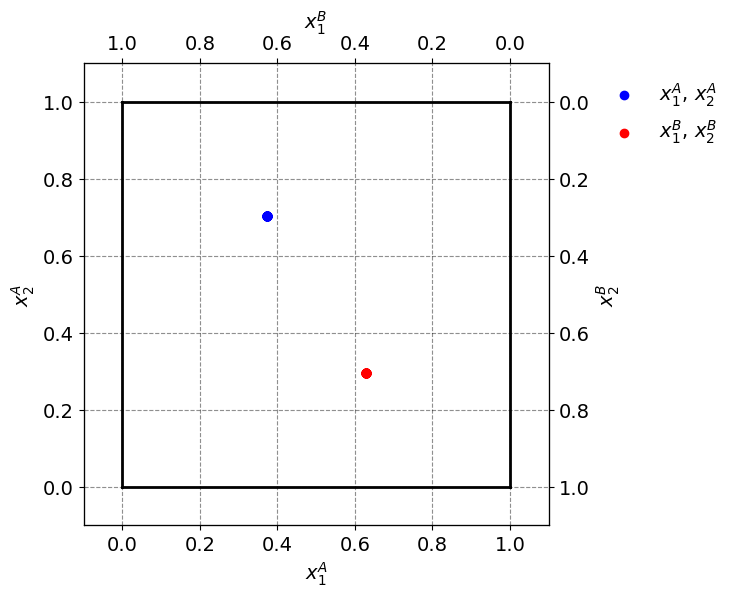

In [14]:
x1A_eq, x2A_eq, X1B_eq, X2B_eq = model.solve_market_equilibrium(WA1)
print(f'The market equilibrium is: (x1A,x2A) = ({x1A_eq[0]:.3f},{x2A_eq[0]:.3f}), (x1B,x2B) = ({X1B_eq[0]:.3f},{X2B_eq[0]:.3f})')

# a. figure set up
fig = plt.figure(frameon=True,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# b. scatter plot for equilibrium allocations
ax_A.scatter(x1A_eq, x2A_eq,marker='o',color='blue',label='$x_1^A$, $x_2^A$')
ax_A.scatter(X1B_eq, X2B_eq,marker='o',color='red',label='$x_1^B$, $x_2^B$')

# c. limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=False,loc='upper right',bbox_to_anchor=(1.4,1.0));

ADD CONCISE CONLUSION.